# Problem 1: Join accessibility datasets into a grid and visualize the data on a map (10 points)

- Desired output from problem 1: Travel times by public transport (PT) and car to Itis and Myyrmanni

Data

The data/ directory in this repository contains all the required input data for this exercise:

- Travel time data: travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt (Travel times and distances in the Helsinki Region to different shopping centers as text files)

- Reference grid: MetropAccess_YKR_grid_EurefFIN.shp.

Column from_id in the travel time data sets corresponds to the YKR_ID column in the grid shapefile

We will focus on travel times to Itis and Myyrmanni. Our goal is to visualize travel times by public transport and car to both shopping centers.

Before plotting the maps we need to classify the data.
- Your task is to first develop the processing steps using Itis as input
- repeat the steps for Myyrmanni.

In [123]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import os

- Read the Polygon grid MetropAccess_YKR_grid_EurefFIN.shp into a GeoDataFrame called grid using geopandas:

In [124]:
fp = r"exercise-4-main\data\MetropAccess_YKR_grid_EurefFIN.shp"

grid_path = os.path.join(fp)
grid = gpd.read_file(grid_path)

grid.head()

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [125]:
# NON-EDITABLE TEST CELL
# Check the data
print("\nYKR GRID:", len(grid), "rows")


YKR GRID: 13231 rows


- Read the travel time data file for Itis using Pandas into a variable called data.  (Separator is ";" in the input file.)

- Select only following columns from the file: *pt_r_t*, *car_r_t*, *from_id*, *to_id*

In [126]:
fp = r"TravelTimes_to_5944003_Itis.txt"
directory = r"exercise-4-main\data"

travel_time_data = os.path.join(directory, fp)

data = pd.read_csv(travel_time_data, sep=';')

print(data.head())

   from_id    to_id  walk_t  walk_d  car_r_t  car_r_d  car_m_t  car_m_d  \
0  5785640  5944003     494   34582       50    36229       44    36229   
1  5785641  5944003     457   31966       51    36439       45    36439   
2  5785642  5944003     458   32046       58    35841       52    34064   
3  5785643  5944003     462   32338       57    37723       50    37935   
4  5787544  5944003     487   34093       50    35803       44    35803   

   pt_r_t  pt_r_tt  pt_r_d  pt_m_t  pt_m_tt  pt_m_d  
0     132      157   38465     142      173   38465  
1     135      154   38671     145      171   38671  
2     137      154   38789     147      172   38789  
3     141      163   39082     151      176   39082  
4     125      142   37976     122      148   37786  


In [127]:
#extract the following columns: pt_r_t, car_r_t, from_id, to_id from all attributes
data = data[ ['pt_r_t', 'car_r_t', 'from_id', 'to_id' ] ]

In [128]:
data.head()

,pt_r_t,car_r_t,from_id,to_id
0,132,50,5785640,5944003
1,135,51,5785641,5944003
2,137,58,5785642,5944003
3,141,57,5785643,5944003
4,125,50,5787544,5944003


In [129]:
# NON-EDITABLE TEST CELL
# Check the data
print(f"\nITIS: {len(data)} rows")


ITIS: 13231 rows


join attributes from *data* to *grid* using the merge function:

- YKR_ID -column in grid corresponds to the from_id column in data

- store the join output into a variable called data_geo

In [130]:
print(data.head())
print(grid.head())

   pt_r_t  car_r_t  from_id    to_id
0     132       50  5785640  5944003
1     135       51  5785641  5944003
2     137       58  5785642  5944003
3     141       57  5785643  5944003
4     125       50  5787544  5944003
          x          y   YKR_ID  \
0  381875.0  6697880.0  5785640   
1  382125.0  6697880.0  5785641   
2  382375.0  6697880.0  5785642   
3  382625.0  6697880.0  5785643   
4  381125.0  6697630.0  5787544   

                                            geometry  
0  POLYGON ((382000.000 6697750.000, 381750.000 6...  
1  POLYGON ((382250.000 6697750.000, 382000.000 6...  
2  POLYGON ((382500.000 6697750.000, 382250.000 6...  
3  POLYGON ((382750.000 6697750.000, 382500.000 6...  
4  POLYGON ((381250.000 6697500.000, 381000.000 6...  


In [131]:
#join attributes from data dataframe to grid dataframe
#compute outer join to preserve ID's from both grid and data datasets
#indicator is used to create a new column to identify ID's that do not have exist in both datasets.
data_geo = grid.merge(data,  how='outer', left_on = 'YKR_ID', right_on ='from_id', indicator=True )

In [132]:
print(data_geo.head())

          x          y   YKR_ID  \
0  381875.0  6697880.0  5785640   
1  382125.0  6697880.0  5785641   
2  382375.0  6697880.0  5785642   
3  382625.0  6697880.0  5785643   
4  381125.0  6697630.0  5787544   

                                            geometry  pt_r_t  car_r_t  \
0  POLYGON ((382000.000 6697750.000, 381750.000 6...     132       50   
1  POLYGON ((382250.000 6697750.000, 382000.000 6...     135       51   
2  POLYGON ((382500.000 6697750.000, 382250.000 6...     137       58   
3  POLYGON ((382750.000 6697750.000, 382500.000 6...     141       57   
4  POLYGON ((381250.000 6697500.000, 381000.000 6...     125       50   

   from_id    to_id _merge  
0  5785640  5944003   both  
1  5785641  5944003   both  
2  5785642  5944003   both  
3  5785643  5944003   both  
4  5787544  5944003   both  


In [133]:
#Identify count of ID's that do not exist in either the data or grid datasets.
data_geo['_merge'].value_counts()

both          13231
left_only         0
right_only        0
Name: _merge, dtype: int64

In [134]:
# NON-EDITABLE TEST CELL
#Check data type
assert type(data_geo) == gpd.geodataframe.GeoDataFrame, "Output should be a geodataframe."

In [135]:
# NON-EDITABLE TEST CELL
# Check that the merged output have (at least) the necessary columns
required_columns = ['YKR_ID', 'pt_r_t', 'car_r_t', 'geometry']

assert all(x in data_geo.columns for x in required_columns), "Couldn't find all required columns."

Remove all rows containing no-data values (-1) from data_geo. 
- You can for example replace the no-data values with numpy's np.nan
- then drop rows containing no-data values using the DataFrame.dropna function.

In [136]:
#check for -1 values in id rows
v_count1 = (data_geo['YKR_ID'] == -1).value_counts(dropna=False)
v_count2 = (data_geo['from_id'] == -1).value_counts(dropna=False)

print(v_count1, len(v_count1))
print(v_count2, len(v_count2))

False    13231
Name: YKR_ID, dtype: int64 1
False    13231
Name: from_id, dtype: int64 1


In [137]:
#identify rows with -1 values

def check_cols_na(gdf,null_match=-1):

    #iterate through the columns
    for col in gdf.columns:
        #create a column mask to check for -1 values
        #if the aggregate count of the given column is greater than 1, indicating T and F detected
        if ( len((gdf[col] == null_match).value_counts(dropna=False)) >1):

            #print rows with -1 values
            print("Row with -1:", col)
        
#iterate through the columns
for col in data_geo.columns:
    
    #create a column mask to check for -1 values
    #if the aggregate count of the given column is greater than 1, indicating T and F detected
    if ( len((data_geo[col] == -1).value_counts(dropna=False)) >1):
        
        #print rows with -1 values
        print("Row with -1:", col)
        

print('-----')
check_cols_na(data_geo)

Row with -1: pt_r_t
Row with -1: car_r_t
Row with -1: to_id
-----
Row with -1: pt_r_t
Row with -1: car_r_t
Row with -1: to_id


In [138]:
import numpy as np

def remove_na(gdf,null_match=-1):
    '''poor way to find nulls and remove the rows from the dataset.'''
    row_index_with_na = []
    
    #create a copy instance
    gdf_copy = gdf.copy()
    
    #ensure index starts from 0 to N
    gdf_copy.reset_index(inplace=True)

    #iterate through the columns
    for col in gdf_copy.columns:

        #create a column mask to check for -1 values
        #if the aggregate count of the given column is greater than 1, indicating T and F detected
        if ( len((gdf_copy[col] == null_match).value_counts(dropna=False)) >1):

            #find null row indices in dataframe append to row index list
            for row in range(0, len(gdf[col])):
                if (gdf_copy.loc[row,col] == null_match):
                    row_index_with_na.append(row)
    
    #drop rows with NA values
    gdf_copy.drop(labels = row_index_with_na, axis= 0, inplace=True)
    print("Archaic NA removal: ",len(gdf_copy))
    
#test call of function
#remove_na(data_geo)

In [139]:
#more efficient way of removing null values from dataframe
data_geo.replace(-1, np.nan, inplace=True)

#drop NA values if there any NA values in thw row, do not make a copy of the instance.
data_geo.dropna(axis=0, how='any', inplace=True)

print("simplified NA removal: " , len(data_geo))

simplified NA removal:  13020


In [140]:
# NON-EDITABLE TEST CELL
# Check that -1 values are not present in the columns
assert -1 not in data_geo["pt_r_t"], "NoData values (-1) should be removed from the data!"

Classify the travel times for both travel modes (public transport and private car) into five-minute intervals
- Create a UserDefined classifier using the pysal/mapclassify library using these class breaks: 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60

In [141]:
import mapclassify

#Create a user defined classifier
classifier = mapclassify.UserDefined.make(bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

- Apply the classifier to pt_r_t and car_r_t columns and store the results to pt_r_t_cl and car_r_t_cl columns, respectively

Notice that these 12 class breaks will produce 13 classes (1 class break divides the data into two classes).

In [142]:
#apply Classifier to the pt_r_t column and create a new column with the new output 
data_geo['pt_r_t_cl'] = data_geo[['pt_r_t']].apply(classifier)

#Lets see what we have
data_geo.head()

data_geo['pt_r_t_cl'].value_counts()

12    6643
10    1055
11    1010
9      977
7      814
8      768
6      664
5      478
4      321
3      200
2       76
1       13
0        1
Name: pt_r_t_cl, dtype: int64

In [143]:
#apply Classifier to the car_r_t column and create a new column with the new output
data_geo['car_r_t_cl'] = data_geo[['car_r_t']].apply(classifier)

#Lets see what we have
data_geo['car_r_t_cl'].head()

data_geo['car_r_t_cl'].value_counts()

5     1985
6     1611
4     1604
7     1580
8     1441
9     1346
3     1024
10     896
11     545
12     467
2      393
1      125
0        3
Name: car_r_t_cl, dtype: int64

In [144]:
# NON-EDITABLE TEST CELL
#Check the output
print("travel times by public transport:")
print(data_geo[['YKR_ID', 'pt_r_t', 'pt_r_t_cl']].head())

travel times by public transport:
    YKR_ID  pt_r_t  pt_r_t_cl
0  5785640   132.0         12
1  5785641   135.0         12
2  5785642   137.0         12
3  5785643   141.0         12
4  5787544   125.0         12


In [145]:
# NON-EDITABLE TEST CELL
#Check the output
print("Travel times by car:")
print(data_geo[['YKR_ID','car_r_t', 'car_r_t_cl']].head())

Travel times by car:
    YKR_ID  car_r_t  car_r_t_cl
0  5785640     50.0           9
1  5785641     51.0          10
2  5785642     58.0          11
3  5785643     57.0          11
4  5787544     50.0           9


Create a 1x2 plot where the you plot travel times by public transport and travel times by car to Itis:

- Create subplots using matplotlib having 1 row and 2 columns (use parameters nrows & ncols), and the figure size should be 10 inches by 5 inches (use parameter figsize)
- Add titles for the subplots as seen in the example above
- Remove the empty whitespace around the plots using function plt.tight_layout()
- Save the figure into disk with filename itis_accessibility.png

In [146]:
import matplotlib.pyplot as plt

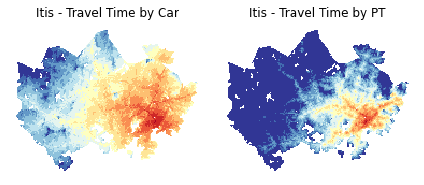

In [147]:
# always create your matplotlib objects ahead of time and pass them to the plotting methods (or use them directly)
#reference https://stackoverflow.com/questions/38253948/geopandas-plots-as-subfigures

#under method2, using matplotlib objects to plot example
#reference: https://geopandas.org/en/stable/docs/user_guide/mapping.html
fig, axs = plt.subplots(nrows = 1, ncols=2, sharex=True, sharey=True)

plot1 = data_geo.plot(ax=axs[0], column= 'car_r_t_cl', cmap="RdYlBu", linewidth=0, legend =False, figsize=(10, 5))
plot2 = data_geo.plot(ax=axs[1], column= 'pt_r_t_cl', cmap="RdYlBu", linewidth=0, legend =False, figsize=(10, 5))

#set title for each axes object
plot1.set_title('Itis - Travel Time by Car')
plot2.set_title('Itis - Travel Time by PT')

#turn off the axis for each axes object
plot1.axis('off')
plot2.axis('off')

#remove all whitespace from all axes objects
plt.tight_layout()

#show all axes object
plt.show()

In [148]:
#grab fig from subplot object and print the plot.
output_fig1 = 'itis_accessibility.jpg'

#How to save figure using matplotlib
#https://stackoverflow.com/questions/19555525/saving-plots-axessubplot-generated-from-python-pandas-with-matplotlibs-savefi
fig.savefig(output_fig1)

In [149]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
import os
assert os.path.isfile(output_fig1), "figure does not exists!"

# Next, your task is to repeat all the same steps for Myyrmanni (data/TravelTimes_to_5902043_Myyrmanni.txt):
- Read text file using pandas into a variable called data
- Select columns 'pt_r_t', 'car_r_t', 'from_id', 'to_id'
- Make table join between grid and travel time data. Store output in a variable called data_geo
- Remove no data values
- Classify the values in columns 'pt_r_t', 'car_r_t' into new columns 'pt_r_t_cl', 'car_r_t_cl'
- Plot travel times by public transport and travel times by car.
- Save output image to file (myyrmanni_accessibility.png)

Read text file using pandas into a variable called data

In [150]:
#read test file using pandas into variable called_data
fp2 = r'TravelTimes_to_5902043_Myyrmanni.txt'
directory2 = r'exercise-4-main/data'

path2 = os.path.join(directory2, fp2)
data = pd.read_csv(path2, sep=';')

In [151]:
data.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5902043,295,20668,39,22321,35,22321,90,121,21119,98,129,21119
1,5785641,5902043,258,18052,39,22532,35,22532,93,115,21325,101,127,21325
2,5785642,5902043,259,18131,47,22216,42,20440,95,115,21443,103,128,21443
3,5785643,5902043,263,18424,51,24773,46,22996,99,126,21736,107,132,21736
4,5787544,5902043,288,20179,38,21895,34,21895,83,103,20630,91,108,20630


select only columns pt_r_t, car_r_t, from_id, to_id  from data df

In [152]:
data = data[ [ 'pt_r_t' , 'car_r_t', 'from_id', 'to_id' ] ] 

In [153]:
data.head()

,pt_r_t,car_r_t,from_id,to_id
0,90,39,5785640,5902043
1,93,39,5785641,5902043
2,95,47,5785642,5902043
3,99,51,5785643,5902043
4,83,38,5787544,5902043


make table join between grid and travel time data. Store output in variable called data_geo

In [154]:
#Join on YKR_ID in grid geodataframe & from_id in data dataframe
#perform full outer join to retain rows where 'id' may not exist in boh grid and data df.
#indicator is used to identify if the ID exists in the other df.
data_geo = grid.merge(data,  how='outer', left_on = 'YKR_ID', right_on ='from_id', indicator=True )

In [155]:
data_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id,_merge
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",90,39,5785640,5902043,both
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",93,39,5785641,5902043,both
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",95,47,5785642,5902043,both
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",99,51,5785643,5902043,both
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",83,38,5787544,5902043,both


In [156]:
#it appears that all the id's match up on both dataframes.
data_geo['_merge'].value_counts()

both          13231
left_only         0
right_only        0
Name: _merge, dtype: int64

Remove no data values

In [157]:
#check and verify which columns have na values
check_cols_na(data_geo)

Row with -1: pt_r_t
Row with -1: car_r_t
Row with -1: to_id


In [158]:
#replace -1 value with np.nan for all values in the dataframe
data_geo.replace(-1, np.nan, inplace=True)

#drop NA values if there any NA values in the row, do not make a copy of the instance.
data_geo.dropna(axis=0, how='any', inplace=True)

print("simplified NA removal: " , len(data_geo))

simplified NA removal:  13020


Classify the values in columns 'pt_r_t', 'car_r_t' into new columns 'pt_r_t_cl', 'car_r_t_cl'

In [159]:
#Create a user defined classifier
classifier = mapclassify.UserDefined.make(bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

#apply the classifier to col pt_r_t and create a new column, pt_r_t_cl 
data_geo['pt_r_t_cl'] = data_geo[ ['pt_r_t'] ].apply(classifier)

#apply the classifier to col car_r_t and create a new column, car_r_t_cl
data_geo['car_r_t_cl'] = data_geo[ ['car_r_t'] ].apply(classifier)

In [160]:
data_geo['pt_r_t_cl'].value_counts()

12    4876
10    1320
11    1247
9     1229
8     1226
7     1074
6      824
5      565
4      341
3      197
2      102
1       17
0        2
Name: pt_r_t_cl, dtype: int64

In [161]:
data_geo['car_r_t_cl'].value_counts()

6     2516
7     2480
5     2351
8     1676
4     1575
3      812
9      715
10     374
2      255
11     162
12      65
1       38
0        1
Name: car_r_t_cl, dtype: int64

 Plot travel times by public transport and travel times by car.

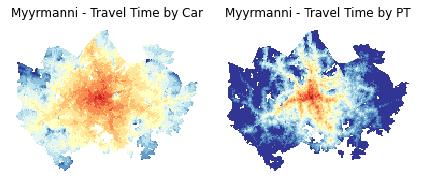

In [162]:
fig, axs = plt.subplots(nrows = 1, ncols=2, sharex=True, sharey=True)

plot1 = data_geo.plot(ax=axs[0], column= 'car_r_t_cl', cmap="RdYlBu", linewidth=0, legend =False, figsize=(10, 5))
plot2 = data_geo.plot(ax=axs[1], column= 'pt_r_t_cl', cmap="RdYlBu", linewidth=0, legend =False, figsize=(10, 5))

#set title for each axes object
plot1.set_title('Myyrmanni - Travel Time by Car')
plot2.set_title('Myyrmanni - Travel Time by PT')

#turn off the axis for each axes object
plot1.axis('off')
plot2.axis('off')

#remove all whitespace from all axes objects
plt.tight_layout()

#show all axes object
plt.show()

Save output image to file (myyrmanni_accessibility.png)

In [163]:
output_fig2 = 'myyrmanni_accessibility.png'
fig.savefig(output_fig2)

In [164]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
import os
assert os.path.isfile(output_fig2), "figure does not exists!"

# Optional: 4-panel figure

- As an optional task, plot travel times to Itis and Myyrmanni all in one 4-panel figure (see example at the top of this page)!

Hints:

- create a for-loop where you repeat all the steps for Itis and Myyrmanni (you can iterate over a list of input filepaths)
- Before the for-loop, create a figure with 4 subplots (2 rows and 2 columns) and use figsize=(10,10)
- Inside the for-loop, plot each map into one of the subplots.
- save the figure as shopping_center_accessibility.png

In [174]:
#stores the list of Travel_Times_XXX.txt files
file_list = [travel_time_data, path2]

def plot_data_geo(list_of_travel_time_files, grid_file_path):
    
    #number rows is dependent on number of travel time files
    fig, axs = plt.subplots(nrows = len(list_of_travel_time_files), ncols=2, sharex=True, sharey=True)
    
    #store the geodataframe instances after processing list_of_travel_times file
    gdf_list = [] 
    
    for index in range(0,len(list_of_travel_time_files)):
        
        classified_gdf = classify_travel_times_with_grid(list_of_travel_time_files[index], grid_file_path)
        
        #append tuple of axes objects generated from plotting the geodataframe output of the classify functions
        gdf_list.append( 
            (
            classified_gdf.plot(ax=axs[index,0], column= 'car_r_t_cl', cmap="RdYlBu", linewidth=0, legend=False, figsize=(10, 10)) ,
            
            classified_gdf.plot(ax=axs[index,1], column= 'pt_r_t_cl', cmap="RdYlBu", linewidth=0, legend=False, figsize=(10, 10))
            )
        )
        
    for index in range(0, len(gdf_list)):
        #set title for each axes object
        gdf_list[index][0].set_title('Travel Time by Car')
        gdf_list[index][1].set_title('Travel Time by PT')

        #turn off the axis for each axes object
        gdf_list[index][0].axis('off')
        gdf_list[index][1].axis('off')

    #remove all whitespace from all axes objects
    plt.tight_layout()

    #show all axes object
    plt.show()
    
    output_fig2 = 'shopping_center_accessibility_{val}.png'.format( val = len(list_of_travel_time_files) )
    fig.savefig(output_fig2)

        
def classify_travel_times_with_grid(file, grid_file):
    
    #read travel times file convert to dataframe
    data = pd.read_csv(file,sep = ';')
    
    #extract a subset of columns from dataframe
    data = data[ [ 'pt_r_t' , 'car_r_t', 'from_id', 'to_id' ] ] 
    
    #read in grid file as a geodataframe
    grid_path = os.path.join(grid_file)
    grid = gpd.read_file(grid_path)
    
    #full outer join between travel times dataframe into grid dataframe matching YKRID = from_id
    data_geo = grid.merge(data,  how='outer', left_on = 'YKR_ID', right_on ='from_id', indicator=True )
    
    #replace -1 values with nan
    data_geo.replace(-1, np.nan, inplace=True)

    #drop NA values if there any NA values in the row, do not make a copy of the instance.
    data_geo.dropna(axis=0, how='any', inplace=True)

    print("simplified NA removal: " , len(data_geo))
    
    #Create a user defined classifier
    classifier = mapclassify.UserDefined.make(bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
    
    #apply Classifier to the pt_r_t column and create a new column with the new output 
    data_geo['pt_r_t_cl'] = data_geo[['pt_r_t']].apply(classifier)
    
    #apply Classifier to the car_r_t column and create a new column with the new output
    data_geo['car_r_t_cl'] = data_geo[['car_r_t']].apply(classifier)
    
    #return a geodataframe with classification columns on pt_r_t_cl and car_r_t_cl
    return data_geo

In [168]:
#identify all files in the file_list for testing
print(file_list)

['exercise-4-main\\data\\TravelTimes_to_5944003_Itis.txt', 'exercise-4-main/data\\TravelTimes_to_5902043_Myyrmanni.txt']


simplified NA removal:  13020
simplified NA removal:  13020


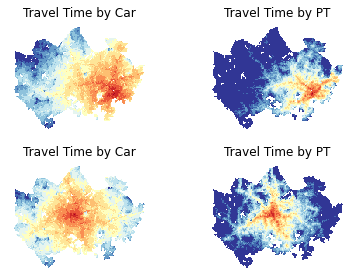

In [175]:
#test function
plot_data_geo(file_list, grid_path)